 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_path = Path("./Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whale_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_df = whale_df.sort_index() 
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:

# Count nulls
whale_df.isnull().mean() * 100
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:

# Drop nulls
whale_df =whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algro_path = Path("./Resources/algo_returns.csv")
algro_df = pd.read_csv(algro_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
algro_df = algro_df.sort_index()
algro_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algro_df.isnull().mean() * 100
algro_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algro_df =algro_df.dropna()
algro_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_path = Path("./Resources/sp_tsx_history.csv")
sp_df = pd.read_csv(sp_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp_df = sp_df.sort_index()
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_df["Close"] = sp_df["Close"].str.replace("$","")
sp_df["Close"] = sp_df["Close"].str.replace(",","")

sp_df['Close'] = sp_df['Close'].astype('float')
sp_df 

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [12]:
sp_df.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp_daily_returns = sp_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_df =sp_df.dropna()
sp_df.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_df = sp_df.rename(columns={
    "Close": "Closing Price" })

sp_df.head() 

,Closing Price
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([whale_df, algro_df, sp_daily_returns], axis="columns", join="inner")
combined_data = combined_data.sort_index()
combined_data.columns = ["SOROS Fund Returns", "Paulson & co Returns", "Tiger Management Returns", "Berkshire Returns", "Algro 1 returns", "Algro 2 Returns", "S&P Returns",]
combined_data.head()

,SOROS Fund Returns,Paulson & co Returns,Tiger Management Returns,Berkshire Returns,Algro 1 returns,Algro 2 Returns,S&P Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Plotted Daily Returns'}, xlabel='Date'>

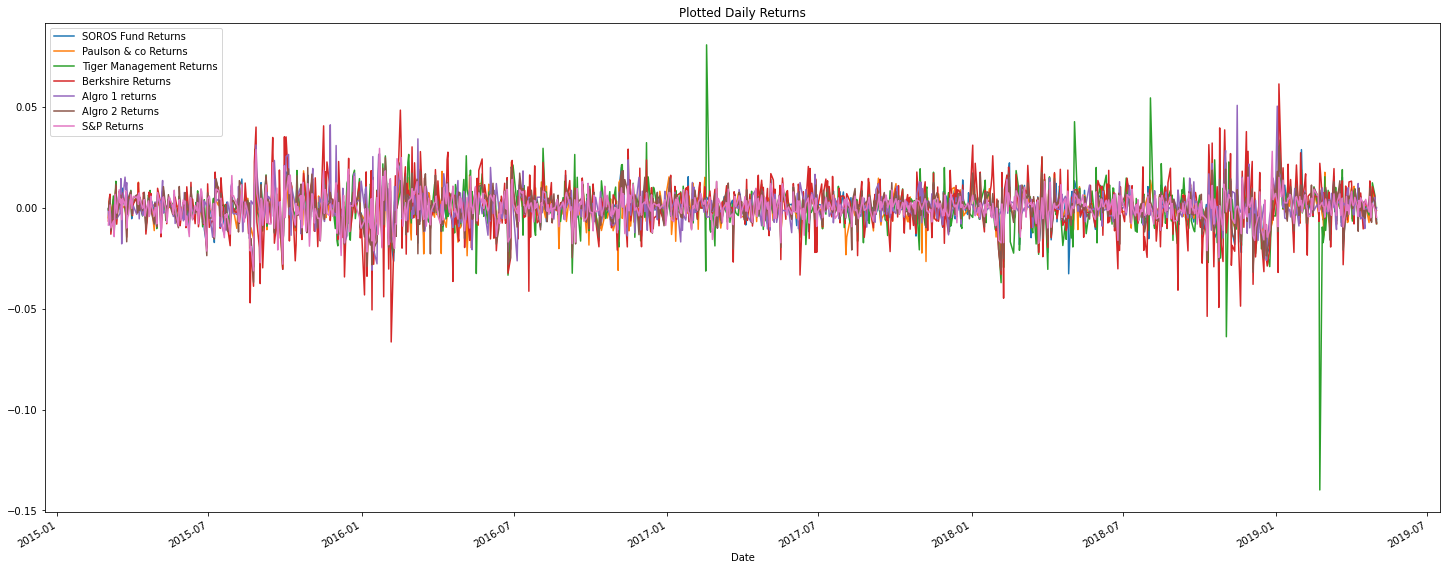

In [82]:
# Plot daily returns of all portfolios
combined_data.plot(figsize=(25,10), title='Plotted Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Plotted cumulative returns'}, xlabel='Date'>

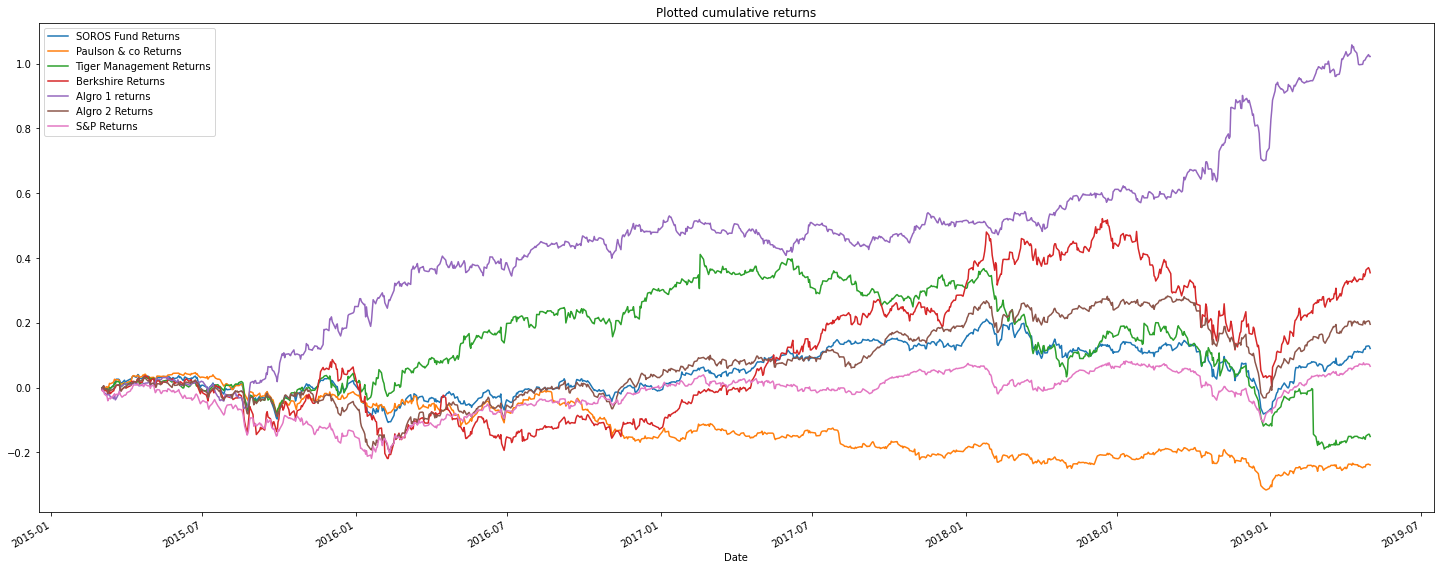

In [81]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod() - 1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(25,10),title='Plotted cumulative returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

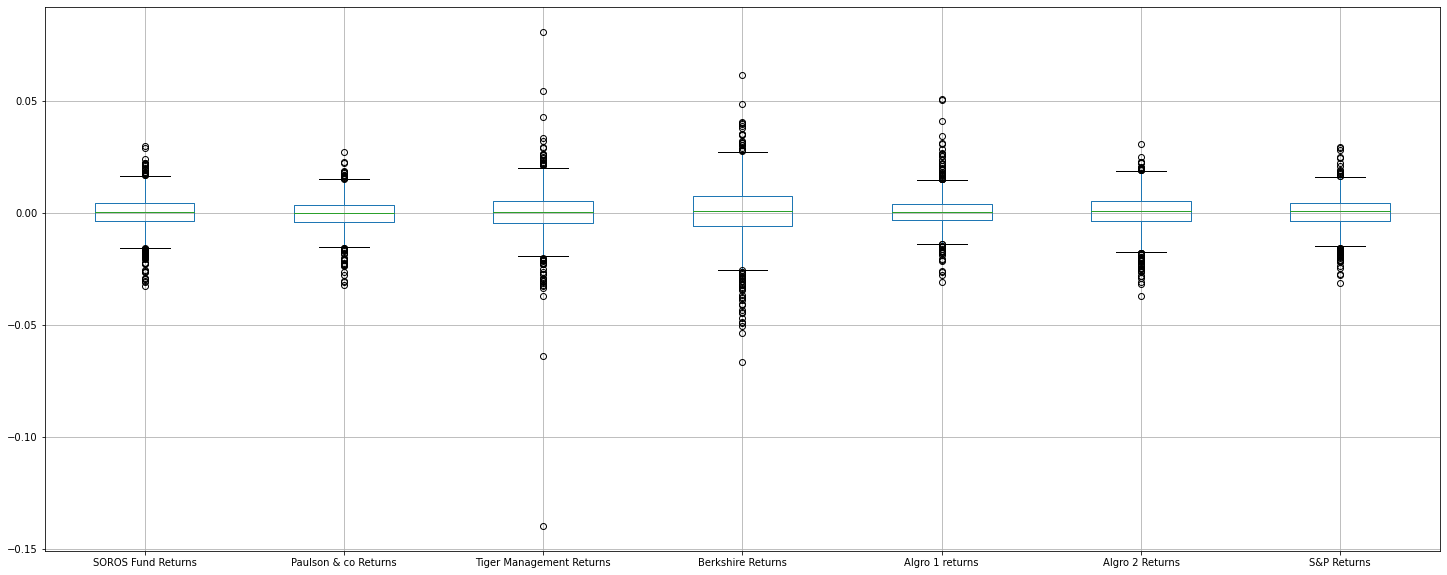

In [80]:
# Box plot to visually show risk
combined_data.boxplot(figsize=(25,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_data_std = combined_data.std()
combined_data_std

SOROS Fund Returns          0.007828
Paulson & co Returns        0.006982
Tiger Management Returns    0.010883
Berkshire Returns           0.012826
Algro 1 returns             0.007589
Algro 2 Returns             0.008326
S&P Returns                 0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = sp_df.std()
sp_tsx_std
# Determine which portfolios are riskier than the S&P TSX 60
tsx = combined_data_std.loc['S&P Returns']
risky_portfolio = combined_data_std[combined_data_std < tsx]
risky_portfolio

Paulson & co Returns    0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_data * np.sqrt(252)
annualized_std

,SOROS Fund Returns,Paulson & co Returns,Tiger Management Returns,Berkshire Returns,Algro 1 returns,Algro 2 Returns,S&P Returns
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,-0.135407
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.053506
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.021334
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.158302
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.086469,0.020688,-0.104054
...,...,...,...,...,...,...,...
2019-04-25,-0.004522,-0.020491,-0.081804,0.076956,0.010834,-0.115050,-0.009973
2019-04-26,0.129369,0.145437,0.196127,0.165633,0.047324,0.083431,0.035779
2019-04-29,0.019912,0.043165,0.099226,0.082917,0.082673,0.044914,-0.012508


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Plotted rolling std with 21-day window'}, xlabel='Date'>

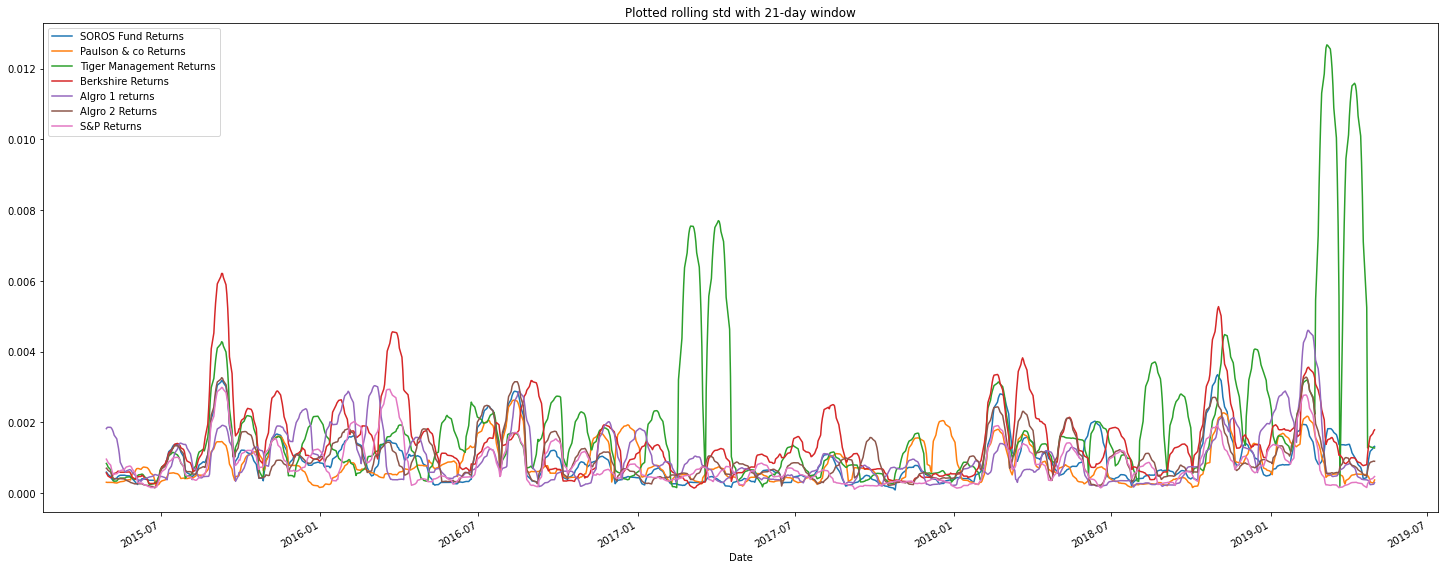

In [78]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_data_stanard_devation = combined_data.rolling(window=21).std()
# Plot the rolling standard deviation
combined_data_stanard_devation.rolling(window=21).std().plot(figsize=(25,10),title='Plotted rolling std with 21-day window')

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = combined_data.corr()
# Display de correlation matrix
correlation

,SOROS Fund Returns,Paulson & co Returns,Tiger Management Returns,Berkshire Returns,Algro 1 returns,Algro 2 Returns,S&P Returns
SOROS Fund Returns,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
Paulson & co Returns,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
Tiger Management Returns,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
Berkshire Returns,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algro 1 returns,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algro 2 Returns,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Plotted beta for Algo and S&P/TSX Returns'}, xlabel='Date'>

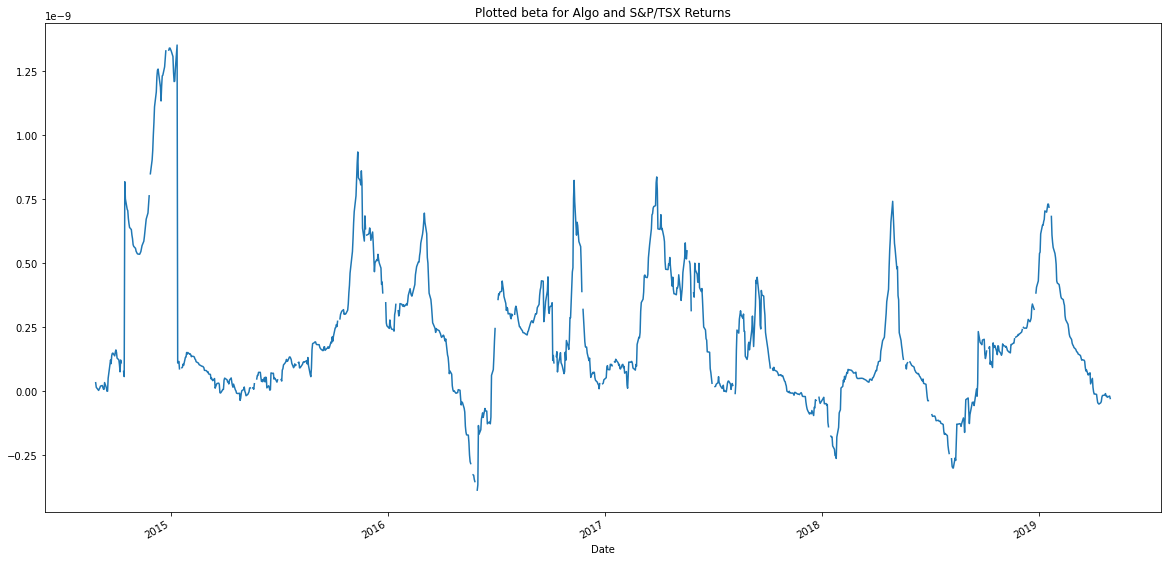

In [77]:
# Calculate covariance of a single portfolio
covariance = algro_df['Algo 1'].rolling(window=60).cov(algro_df['Algo 2'])
covariance
# Calculate variance of S&P TSX
variance = sp_df['Closing Price'].rolling(window=60).var()
variance
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize =(20,10), title='Plotted beta for Algo and S&P/TSX Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average 21-day half life '}, xlabel='Date'>

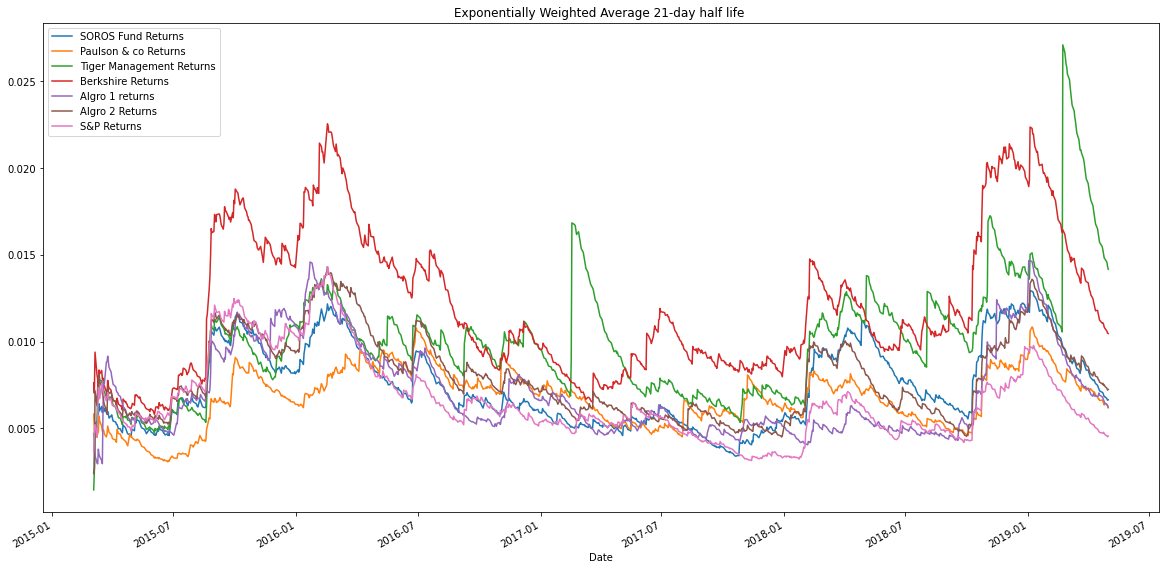

In [76]:
# Use `ewm` to calculate the rolling window
rolling = combined_data.ewm(halflife = 21).std()
rolling.plot(figsize = (20,10), title='Exponentially Weighted Average 21-day half life ')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Annualized Sharpe Ratios
Sharpe_Ratio = combined_data.mean() / combined_data.std()

Annualized_sharpe = (9252**0.5) * Sharpe_Ratio
Annualized_sharpe

SOROS Fund Returns          1.737235
Paulson & co Returns       -3.317999
Tiger Management Returns   -0.875288
Berkshire Returns           2.829935
Algro 1 returns             9.037428
Algro 2 Returns             2.404407
S&P Returns                 1.184884
dtype: float64

<AxesSubplot:>

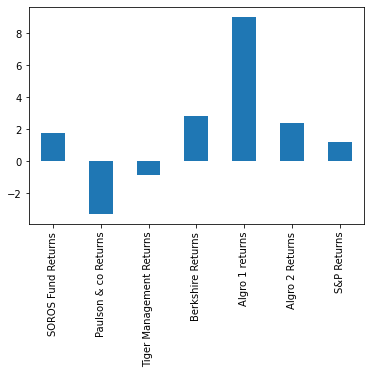

In [93]:
# Visualize the sharpe ratios as a bar plot
Annualized_sharpe.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [ ]:
# The 'Algorithmic 1' portfolio outformed both the S&P TSX and the whales portfolio according to the sharpe ratio/barchart!#

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [29]:
# Reading data from 1st stock
loblaw_path = Path("./Resources/l_historical.csv")
loblaw_df = pd.read_csv(loblaw_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
loblaw_df = loblaw_df.sort_index()
loblaw_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [30]:
# Reading data from 2nd stock
shop_path = Path("./Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
shop_df = shop_df.sort_index()
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [31]:
# Reading data from 3rd stock
open_path = Path("./Resources/otex_historical.csv")
open_df = pd.read_csv(open_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
open_df = open_df.sort_index()
open_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [32]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([loblaw_df, shop_df, open_df], axis="columns", join="inner")
combined_stocks = combined_stocks.sort_index()

combined_stocks.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,SHOP,132.06,OTEX,43.58
2018-01-03,L,57.41,SHOP,135.15,OTEX,43.07
2018-01-04,L,57.42,SHOP,137.46,OTEX,42.91
2018-01-05,L,57.42,SHOP,137.26,OTEX,42.57
2018-01-08,L,56.86,SHOP,139.51,OTEX,42.16


In [33]:
# Reset Date index
combined_stocks.reset_index()
combined_stocks.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,SHOP,132.06,OTEX,43.58
2018-01-03,L,57.41,SHOP,135.15,OTEX,43.07
2018-01-04,L,57.42,SHOP,137.46,OTEX,42.91
2018-01-05,L,57.42,SHOP,137.26,OTEX,42.57
2018-01-08,L,56.86,SHOP,139.51,OTEX,42.16


In [37]:
# Reorganize portfolio data by having a column per symbol

combined_stocks.head()


,OTEX,OTEX,OTEX
Date,,,
2018-01-02,57.99,132.06,43.58
2018-01-03,57.41,135.15,43.07
2018-01-04,57.42,137.46,42.91
2018-01-05,57.42,137.26,42.57
2018-01-08,56.86,139.51,42.16


In [38]:
columns = ["L", "SHOP", "OTEX"]
combined_stocks.columns = columns
combined_stocks.head()

,L,SHOP,OTEX
Date,,,
2018-01-02,57.99,132.06,43.58
2018-01-03,57.41,135.15,43.07
2018-01-04,57.42,137.46,42.91
2018-01-05,57.42,137.26,42.57
2018-01-08,56.86,139.51,42.16


In [40]:
# Calculate daily returns
combined_stocks_daily_returns = combined_stocks.pct_change()
combined_stocks_daily_returns.head()


,L,SHOP,OTEX
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,0.023398,-0.011703
2018-01-04,0.000174,0.017092,-0.003715
2018-01-05,0.000000,-0.001455,-0.007924
2018-01-08,-0.009753,0.016392,-0.009631


In [44]:
# Drop NAs
combined_stocks_daily_returns.dropna()

,L,SHOP,OTEX
Date,,,
2018-01-03,-0.010002,0.023398,-0.011703
2018-01-04,0.000174,0.017092,-0.003715
2018-01-05,0.000000,-0.001455,-0.007924
2018-01-08,-0.009753,0.016392,-0.009631
2018-01-09,0.008969,-0.011254,-0.000712
...,...,...,...
2019-12-20,0.003547,-0.005503,0.024441
2019-12-23,-0.003240,-0.003118,-0.013463
2019-12-24,-0.000148,0.026915,-0.007773


In [45]:
# Display sample data
combined_stocks_daily_returns.sample()

,L,SHOP,OTEX
Date,,,
2019-03-27,0.007476,-0.018864,0.00733


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_stocks_daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-02         NaN
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
total_combined_portfolios = pd.concat([combined_stocks, combined_data], axis="columns", join="inner")
total_combined_portfolios = total_combined_portfolios.sort_index()
total_combined_portfolios.head()

,L,SHOP,OTEX,SOROS Fund Returns,Paulson & co Returns,Tiger Management Returns,Berkshire Returns,Algro 1 returns,Algro 2 Returns,S&P Returns
Date,,,,,,,,,,
2018-01-02,57.99,132.06,43.58,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222
2018-01-03,57.41,135.15,43.07,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,57.42,137.46,42.91,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,57.42,137.26,42.57,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,56.86,139.51,42.16,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_combined_portfolios.dropna()

,L,SHOP,OTEX,SOROS Fund Returns,Paulson & co Returns,Tiger Management Returns,Berkshire Returns,Algro 1 returns,Algro 2 Returns,S&P Returns
Date,,,,,,,,,,
2018-01-02,57.99,132.06,43.58,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222
2018-01-03,57.41,135.15,43.07,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,57.42,137.46,42.91,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,57.42,137.26,42.57,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,56.86,139.51,42.16,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,65.36,295.37,51.73,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,65.12,299.10,51.77,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,65.31,303.04,51.45,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
annualized_std_total_port = total_combined_portfolios * np.sqrt(252)
annualized_std_total_port

,L,SHOP,OTEX,SOROS Fund Returns,Paulson & co Returns,Tiger Management Returns,Berkshire Returns,Algro 1 returns,Algro 2 Returns,S&P Returns
Date,,,,,,,,,,
2018-01-02,920.562711,2096.387509,691.811053,0.230917,0.238830,-0.075937,0.492385,0.019906,0.273383,0.098778
2018-01-03,911.355497,2145.439738,683.715054,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059916
2018-01-04,911.514242,2182.109851,681.175133,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,0.040133
2018-01-05,911.514242,2178.934950,675.777800,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,-0.061417
2018-01-08,902.624517,2214.652592,669.269252,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,-0.030867
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,1037.557834,4688.853388,821.188292,-0.004522,-0.020491,-0.081804,0.076956,0.010834,-0.115050,-0.009973
2019-04-26,1033.747952,4748.065303,821.823272,0.129369,0.145437,0.196127,0.165633,0.047324,0.083431,0.035779
2019-04-29,1036.764109,4810.610864,816.743430,0.019912,0.043165,0.099226,0.082917,0.082673,0.044914,-0.012508


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day std'}, xlabel='Date'>

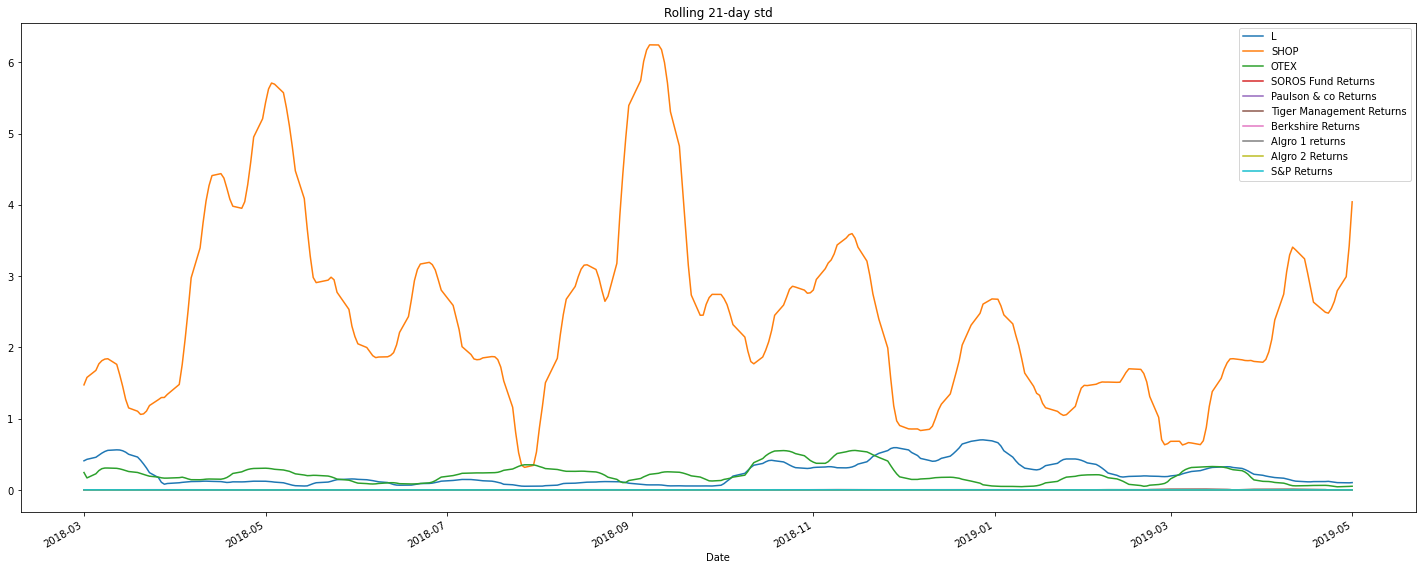

In [74]:
# Calculate rolling standard deviation
total_rolling_std = total_combined_portfolios.rolling(window=21).std()

# Plot rolling standard deviation

total_rolling_std.rolling(window=21).std().plot(figsize=(25,10), title='Rolling 21-day std')

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Plotted Correlation'}>

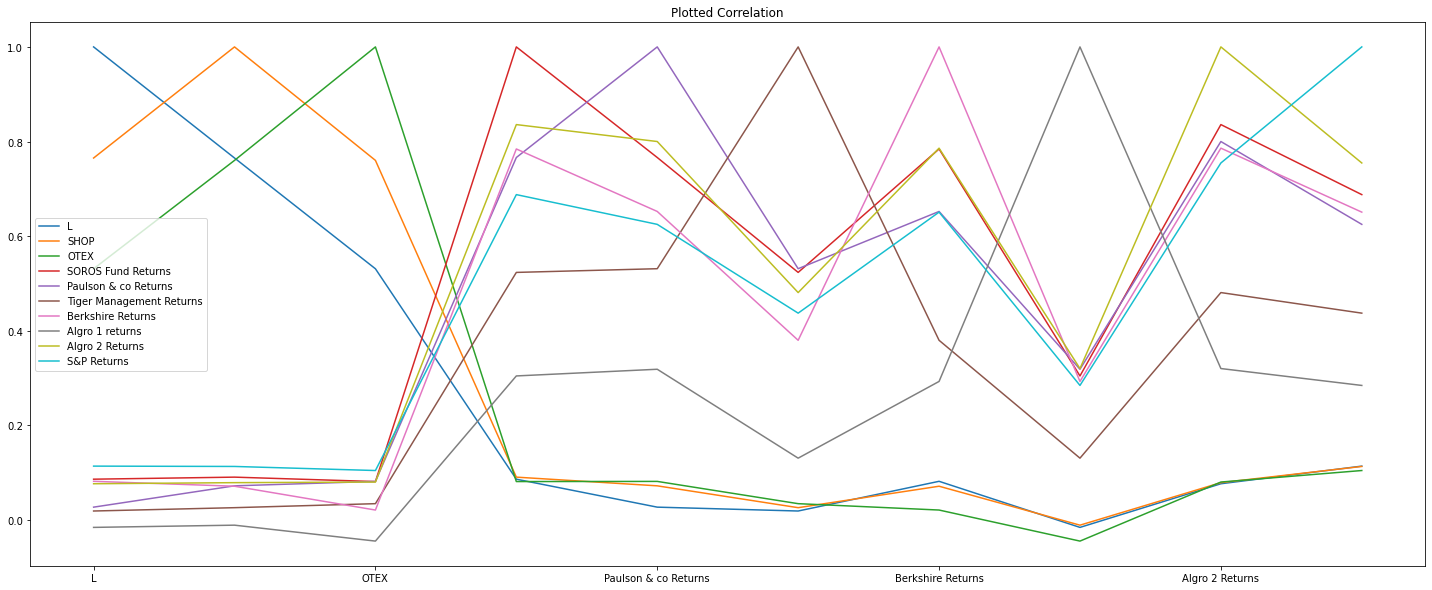

In [72]:
# Calculate and plot the correlation
combined_correlation = total_combined_portfolios.corr()
combined_correlation.plot(figsize=(25,10), title='Plotted Correlation')

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day'}>

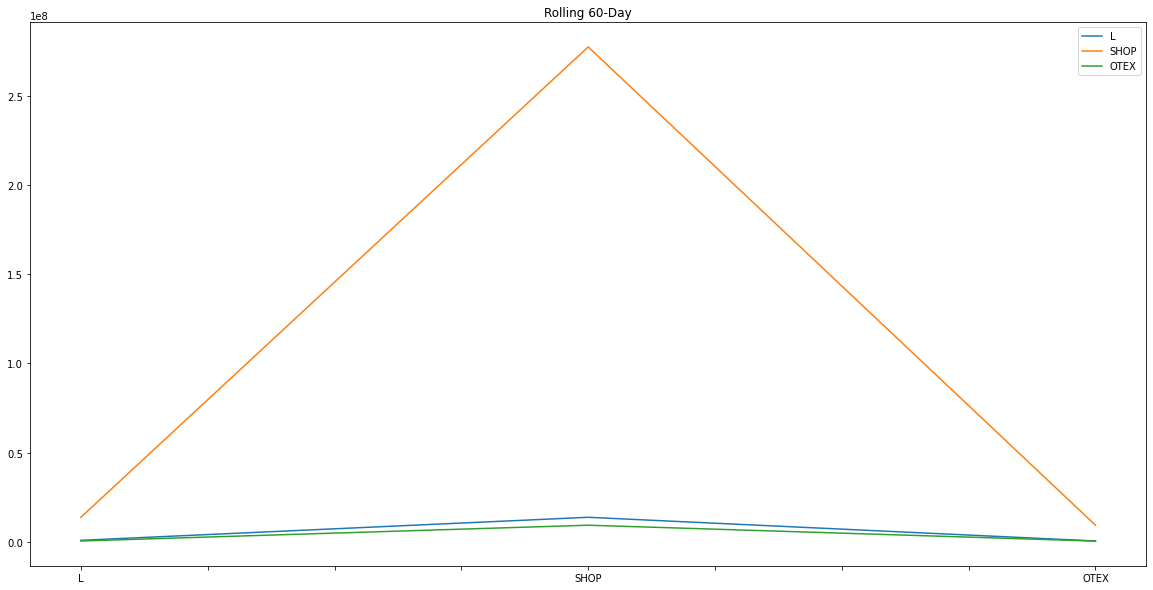

In [71]:
# Calculate and plot Beta

covariance = combined_stocks.cov()

variance = combined_data['S&P Returns'].var()
variance

rolling_beta = covariance / variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Calculate Annualzied Sharpe Ratios
Sharpe_Ratio2 = combined_stocks_daily_returns.mean() / combined_stocks_daily_returns.std()

Annualized_sharpe2 = (9252**0.5) * Sharpe_Ratio2
Annualized_sharpe2

L        3.454271
SHOP    10.031139
OTEX     4.505109
dtype: float64

<AxesSubplot:>

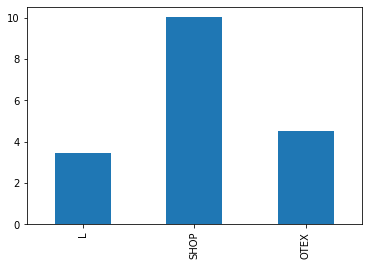

In [96]:
# Visualize the sharpe ratios as a bar plot
Annualized_sharpe2.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

In [ ]:
# My three stock portfolio performed well! No losses, and huge gains with shopify.